In [1]:
# Define the object we use
import matplotlib.dates as dates
from datetime import datetime

class geminiData:
    GainLoss = 0
    Variance = 0
    Volume   = 0
    Hour     = 0
    Day      = 0
    Date     = 0;

geminiDatas = []

In [3]:
# reference to this https://realpython.com/python-csv/
import csv

with open ('GEMINI_BTC.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count >= 2:
            line_count += 1
            #1: Date
            #2: Symbol
            #3: Open
            #4: High
            #5: Low
            #6: Close
            #7: Volume
            
            # Gain loss
            temp = geminiData()
            temp.GainLoss = float(row[3]) - float(row[6])
            # Variance
            temp.Variance = float(row[4]) - float(row[5])
            # Volume 
            temp.Volume = int (row[7].replace("." , ""))
            # Hour
            temp.Hour = row[1].split(" ")[1].split(":")[0]
            # Day
            temp.Day = row[1].split(" ")[0].split("-")[2]
            # Date YYYY-MM-DD ref: https://www.journaldev.com/23365/python-string-to-datetime-strptime
            datetime_str = row[1]

            datetime_object = datetime.strptime(datetime_str, '20%y-%m-%d %H:%M:%S')

            print(datetime_object)  # printed in default format
            
            temp.Date = datetime_object
            geminiDatas.append(temp) 
        else:
            line_count += 1
    print(f'Processed {line_count} lines.')
    
    
    
    

2019-04-30 00:00:00
2019-04-29 23:00:00
2019-04-29 22:00:00
2019-04-29 21:00:00
2019-04-29 20:00:00
2019-04-29 19:00:00
2019-04-29 18:00:00
2019-04-29 17:00:00
2019-04-29 16:00:00
2019-04-29 15:00:00
2019-04-29 14:00:00
2019-04-29 13:00:00
2019-04-29 12:00:00
2019-04-29 11:00:00
2019-04-29 10:00:00
2019-04-29 09:00:00
2019-04-29 08:00:00
2019-04-29 07:00:00
2019-04-29 06:00:00
2019-04-29 05:00:00
2019-04-29 04:00:00
2019-04-29 03:00:00
2019-04-29 02:00:00
2019-04-29 01:00:00
2019-04-29 00:00:00
2019-04-28 23:00:00
2019-04-28 22:00:00
2019-04-28 21:00:00
2019-04-28 20:00:00
2019-04-28 19:00:00
2019-04-28 18:00:00
2019-04-28 17:00:00
2019-04-28 16:00:00
2019-04-28 15:00:00
2019-04-28 14:00:00
2019-04-28 13:00:00
2019-04-28 12:00:00
2019-04-28 11:00:00
2019-04-28 10:00:00
2019-04-28 09:00:00
2019-04-28 08:00:00
2019-04-28 07:00:00
2019-04-28 06:00:00
2019-04-28 05:00:00
2019-04-28 04:00:00
2019-04-28 03:00:00
2019-04-28 02:00:00
2019-04-28 01:00:00
2019-04-28 00:00:00
2019-04-27 23:00:00


2019-02-28 22:00:00
2019-02-28 21:00:00
2019-02-28 20:00:00
2019-02-28 19:00:00
2019-02-28 18:00:00
2019-02-28 17:00:00
2019-02-28 16:00:00
2019-02-28 15:00:00
2019-02-28 14:00:00
2019-02-28 13:00:00
2019-02-28 12:00:00
2019-02-28 11:00:00
2019-02-28 10:00:00
2019-02-28 09:00:00
2019-02-28 08:00:00
2019-02-28 07:00:00
2019-02-28 06:00:00
2019-02-28 05:00:00
2019-02-28 04:00:00
2019-02-28 03:00:00
2019-02-28 02:00:00
2019-02-28 01:00:00
2019-02-28 00:00:00
2019-02-27 23:00:00
2019-02-27 22:00:00
2019-02-27 21:00:00
2019-02-27 20:00:00
2019-02-27 19:00:00
2019-02-27 18:00:00
2019-02-27 17:00:00
2019-02-27 16:00:00
2019-02-27 15:00:00
2019-02-27 14:00:00
2019-02-27 13:00:00
2019-02-27 12:00:00
2019-02-27 11:00:00
2019-02-27 10:00:00
2019-02-27 09:00:00
2019-02-27 08:00:00
2019-02-27 07:00:00
2019-02-27 06:00:00
2019-02-27 05:00:00
2019-02-27 04:00:00
2019-02-27 03:00:00
2019-02-27 02:00:00
2019-02-27 01:00:00
2019-02-27 00:00:00
2019-02-26 23:00:00
2019-02-26 22:00:00
2019-02-26 21:00:00


2019-01-17 01:00:00
2019-01-17 00:00:00
2019-01-16 23:00:00
2019-01-16 22:00:00
2019-01-16 21:00:00
2019-01-16 20:00:00
2019-01-16 19:00:00
2019-01-16 18:00:00
2019-01-16 17:00:00
2019-01-16 16:00:00
2019-01-16 15:00:00
2019-01-16 14:00:00
2019-01-16 13:00:00
2019-01-16 12:00:00
2019-01-16 11:00:00
2019-01-16 10:00:00
2019-01-16 09:00:00
2019-01-16 08:00:00
2019-01-16 07:00:00
2019-01-16 06:00:00
2019-01-16 05:00:00
2019-01-16 04:00:00
2019-01-16 03:00:00
2019-01-16 02:00:00
2019-01-16 01:00:00
2019-01-16 00:00:00
2019-01-15 23:00:00
2019-01-15 22:00:00
2019-01-15 21:00:00
2019-01-15 20:00:00
2019-01-15 19:00:00
2019-01-15 18:00:00
2019-01-15 17:00:00
2019-01-15 16:00:00
2019-01-15 15:00:00
2019-01-15 14:00:00
2019-01-15 13:00:00
2019-01-15 12:00:00
2019-01-15 11:00:00
2019-01-15 10:00:00
2019-01-15 09:00:00
2019-01-15 08:00:00
2019-01-15 07:00:00
2019-01-15 06:00:00
2019-01-15 05:00:00
2019-01-15 04:00:00
2019-01-15 03:00:00
2019-01-15 02:00:00
2019-01-15 01:00:00
2019-01-15 00:00:00


2018-12-06 09:00:00
2018-12-06 08:00:00
2018-12-06 07:00:00
2018-12-06 06:00:00
2018-12-06 05:00:00
2018-12-06 04:00:00
2018-12-06 03:00:00
2018-12-06 02:00:00
2018-12-06 01:00:00
2018-12-06 00:00:00
2018-12-05 23:00:00
2018-12-05 22:00:00
2018-12-05 21:00:00
2018-12-05 20:00:00
2018-12-05 19:00:00
2018-12-05 18:00:00
2018-12-05 17:00:00
2018-12-05 16:00:00
2018-12-05 15:00:00
2018-12-05 14:00:00
2018-12-05 13:00:00
2018-12-05 12:00:00
2018-12-05 11:00:00
2018-12-05 10:00:00
2018-12-05 09:00:00
2018-12-05 08:00:00
2018-12-05 07:00:00
2018-12-05 06:00:00
2018-12-05 05:00:00
2018-12-05 04:00:00
2018-12-05 03:00:00
2018-12-05 02:00:00
2018-12-05 01:00:00
2018-12-05 00:00:00
2018-12-04 23:00:00
2018-12-04 22:00:00
2018-12-04 21:00:00
2018-12-04 20:00:00
2018-12-04 19:00:00
2018-12-04 18:00:00
2018-12-04 17:00:00
2018-12-04 16:00:00
2018-12-04 15:00:00
2018-12-04 14:00:00
2018-12-04 13:00:00
2018-12-04 12:00:00
2018-12-04 11:00:00
2018-12-04 10:00:00
2018-12-04 09:00:00
2018-12-04 08:00:00


2018-10-25 18:00:00
2018-10-25 17:00:00
2018-10-25 16:00:00
2018-10-25 15:00:00
2018-10-25 14:00:00
2018-10-25 13:00:00
2018-10-25 12:00:00
2018-10-25 11:00:00
2018-10-25 10:00:00
2018-10-25 09:00:00
2018-10-25 08:00:00
2018-10-25 07:00:00
2018-10-25 06:00:00
2018-10-25 05:00:00
2018-10-25 04:00:00
2018-10-25 03:00:00
2018-10-25 02:00:00
2018-10-25 01:00:00
2018-10-25 00:00:00
2018-10-24 23:00:00
2018-10-24 22:00:00
2018-10-24 21:00:00
2018-10-24 20:00:00
2018-10-24 19:00:00
2018-10-24 18:00:00
2018-10-24 17:00:00
2018-10-24 16:00:00
2018-10-24 15:00:00
2018-10-24 14:00:00
2018-10-24 13:00:00
2018-10-24 12:00:00
2018-10-24 11:00:00
2018-10-24 10:00:00
2018-10-24 09:00:00
2018-10-24 08:00:00
2018-10-24 07:00:00
2018-10-24 06:00:00
2018-10-24 05:00:00
2018-10-24 04:00:00
2018-10-24 03:00:00
2018-10-24 02:00:00
2018-10-24 01:00:00
2018-10-24 00:00:00
2018-10-23 23:00:00
2018-10-23 22:00:00
2018-10-23 21:00:00
2018-10-23 20:00:00
2018-10-23 19:00:00
2018-10-23 18:00:00
2018-10-23 17:00:00


2018-09-14 02:00:00
2018-09-14 01:00:00
2018-09-14 00:00:00
2018-09-13 23:00:00
2018-09-13 22:00:00
2018-09-13 21:00:00
2018-09-13 20:00:00
2018-09-13 19:00:00
2018-09-13 18:00:00
2018-09-13 17:00:00
2018-09-13 16:00:00
2018-09-13 15:00:00
2018-09-13 14:00:00
2018-09-13 13:00:00
2018-09-13 12:00:00
2018-09-13 11:00:00
2018-09-13 10:00:00
2018-09-13 09:00:00
2018-09-13 08:00:00
2018-09-13 07:00:00
2018-09-13 06:00:00
2018-09-13 05:00:00
2018-09-13 04:00:00
2018-09-13 03:00:00
2018-09-13 02:00:00
2018-09-13 01:00:00
2018-09-13 00:00:00
2018-09-12 23:00:00
2018-09-12 22:00:00
2018-09-12 21:00:00
2018-09-12 20:00:00
2018-09-12 19:00:00
2018-09-12 18:00:00
2018-09-12 17:00:00
2018-09-12 16:00:00
2018-09-12 15:00:00
2018-09-12 14:00:00
2018-09-12 13:00:00
2018-09-12 12:00:00
2018-09-12 11:00:00
2018-09-12 10:00:00
2018-09-12 09:00:00
2018-09-12 08:00:00
2018-09-12 07:00:00
2018-09-12 06:00:00
2018-09-12 05:00:00
2018-09-12 04:00:00
2018-09-12 03:00:00
2018-09-12 02:00:00
2018-09-12 01:00:00


2018-08-03 11:00:00
2018-08-03 10:00:00
2018-08-03 09:00:00
2018-08-03 08:00:00
2018-08-03 07:00:00
2018-08-03 06:00:00
2018-08-03 05:00:00
2018-08-03 04:00:00
2018-08-03 03:00:00
2018-08-03 02:00:00
2018-08-03 01:00:00
2018-08-03 00:00:00
2018-08-02 23:00:00
2018-08-02 22:00:00
2018-08-02 21:00:00
2018-08-02 20:00:00
2018-08-02 19:00:00
2018-08-02 18:00:00
2018-08-02 17:00:00
2018-08-02 16:00:00
2018-08-02 15:00:00
2018-08-02 14:00:00
2018-08-02 13:00:00
2018-08-02 12:00:00
2018-08-02 11:00:00
2018-08-02 10:00:00
2018-08-02 09:00:00
2018-08-02 08:00:00
2018-08-02 07:00:00
2018-08-02 06:00:00
2018-08-02 05:00:00
2018-08-02 04:00:00
2018-08-02 03:00:00
2018-08-02 02:00:00
2018-08-02 01:00:00
2018-08-02 00:00:00
2018-08-01 23:00:00
2018-08-01 22:00:00
2018-08-01 21:00:00
2018-08-01 20:00:00
2018-08-01 19:00:00
2018-08-01 18:00:00
2018-08-01 17:00:00
2018-08-01 16:00:00
2018-08-01 15:00:00
2018-08-01 14:00:00
2018-08-01 13:00:00
2018-08-01 12:00:00
2018-08-01 11:00:00
2018-08-01 10:00:00


2018-06-22 19:00:00
2018-06-22 18:00:00
2018-06-22 17:00:00
2018-06-22 16:00:00
2018-06-22 15:00:00
2018-06-22 14:00:00
2018-06-22 13:00:00
2018-06-22 12:00:00
2018-06-22 11:00:00
2018-06-22 10:00:00
2018-06-22 09:00:00
2018-06-22 08:00:00
2018-06-22 07:00:00
2018-06-22 06:00:00
2018-06-22 05:00:00
2018-06-22 04:00:00
2018-06-22 03:00:00
2018-06-22 02:00:00
2018-06-22 01:00:00
2018-06-22 00:00:00
2018-06-21 23:00:00
2018-06-21 22:00:00
2018-06-21 21:00:00
2018-06-21 20:00:00
2018-06-21 19:00:00
2018-06-21 18:00:00
2018-06-21 17:00:00
2018-06-21 16:00:00
2018-06-21 15:00:00
2018-06-21 14:00:00
2018-06-21 13:00:00
2018-06-21 12:00:00
2018-06-21 11:00:00
2018-06-21 10:00:00
2018-06-21 09:00:00
2018-06-21 08:00:00
2018-06-21 07:00:00
2018-06-21 06:00:00
2018-06-21 05:00:00
2018-06-21 04:00:00
2018-06-21 03:00:00
2018-06-21 02:00:00
2018-06-21 01:00:00
2018-06-21 00:00:00
2018-06-20 23:00:00
2018-06-20 22:00:00
2018-06-20 21:00:00
2018-06-20 20:00:00
2018-06-20 19:00:00
2018-06-20 18:00:00


2018-05-12 04:00:00
2018-05-12 03:00:00
2018-05-12 02:00:00
2018-05-12 01:00:00
2018-05-12 00:00:00
2018-05-11 23:00:00
2018-05-11 22:00:00
2018-05-11 21:00:00
2018-05-11 20:00:00
2018-05-11 19:00:00
2018-05-11 18:00:00
2018-05-11 17:00:00
2018-05-11 16:00:00
2018-05-11 15:00:00
2018-05-11 14:00:00
2018-05-11 13:00:00
2018-05-11 12:00:00
2018-05-11 11:00:00
2018-05-11 10:00:00
2018-05-11 09:00:00
2018-05-11 08:00:00
2018-05-11 07:00:00
2018-05-11 06:00:00
2018-05-11 05:00:00
2018-05-11 04:00:00
2018-05-11 03:00:00
2018-05-11 02:00:00
2018-05-11 01:00:00
2018-05-11 00:00:00
2018-05-10 23:00:00
2018-05-10 22:00:00
2018-05-10 21:00:00
2018-05-10 20:00:00
2018-05-10 19:00:00
2018-05-10 18:00:00
2018-05-10 17:00:00
2018-05-10 16:00:00
2018-05-10 15:00:00
2018-05-10 14:00:00
2018-05-10 13:00:00
2018-05-10 12:00:00
2018-05-10 11:00:00
2018-05-10 10:00:00
2018-05-10 09:00:00
2018-05-10 08:00:00
2018-05-10 07:00:00
2018-05-10 06:00:00
2018-05-10 05:00:00
2018-05-10 04:00:00
2018-05-10 03:00:00


2018-03-31 12:00:00
2018-03-31 11:00:00
2018-03-31 10:00:00
2018-03-31 09:00:00
2018-03-31 08:00:00
2018-03-31 07:00:00
2018-03-31 06:00:00
2018-03-31 05:00:00
2018-03-31 04:00:00
2018-03-31 03:00:00
2018-03-31 02:00:00
2018-03-31 01:00:00
2018-03-31 00:00:00
2018-03-30 23:00:00
2018-03-30 22:00:00
2018-03-30 21:00:00
2018-03-30 20:00:00
2018-03-30 19:00:00
2018-03-30 18:00:00
2018-03-30 17:00:00
2018-03-30 16:00:00
2018-03-30 15:00:00
2018-03-30 14:00:00
2018-03-30 13:00:00
2018-03-30 12:00:00
2018-03-30 11:00:00
2018-03-30 10:00:00
2018-03-30 09:00:00
2018-03-30 08:00:00
2018-03-30 07:00:00
2018-03-30 06:00:00
2018-03-30 05:00:00
2018-03-30 04:00:00
2018-03-30 03:00:00
2018-03-30 02:00:00
2018-03-30 01:00:00
2018-03-30 00:00:00
2018-03-29 23:00:00
2018-03-29 22:00:00
2018-03-29 21:00:00
2018-03-29 20:00:00
2018-03-29 19:00:00
2018-03-29 18:00:00
2018-03-29 17:00:00
2018-03-29 16:00:00
2018-03-29 15:00:00
2018-03-29 14:00:00
2018-03-29 13:00:00
2018-03-29 12:00:00
2018-03-29 11:00:00


2018-02-17 21:00:00
2018-02-17 20:00:00
2018-02-17 19:00:00
2018-02-17 18:00:00
2018-02-17 17:00:00
2018-02-17 16:00:00
2018-02-17 15:00:00
2018-02-17 14:00:00
2018-02-17 13:00:00
2018-02-17 12:00:00
2018-02-17 11:00:00
2018-02-17 10:00:00
2018-02-17 09:00:00
2018-02-17 08:00:00
2018-02-17 07:00:00
2018-02-17 06:00:00
2018-02-17 05:00:00
2018-02-17 04:00:00
2018-02-17 03:00:00
2018-02-17 02:00:00
2018-02-17 01:00:00
2018-02-17 00:00:00
2018-02-16 23:00:00
2018-02-16 22:00:00
2018-02-16 21:00:00
2018-02-16 20:00:00
2018-02-16 19:00:00
2018-02-16 18:00:00
2018-02-16 17:00:00
2018-02-16 16:00:00
2018-02-16 15:00:00
2018-02-16 14:00:00
2018-02-16 13:00:00
2018-02-16 12:00:00
2018-02-16 11:00:00
2018-02-16 10:00:00
2018-02-16 09:00:00
2018-02-16 08:00:00
2018-02-16 07:00:00
2018-02-16 06:00:00
2018-02-16 05:00:00
2018-02-16 04:00:00
2018-02-16 03:00:00
2018-02-16 02:00:00
2018-02-16 01:00:00
2018-02-16 00:00:00
2018-02-15 23:00:00
2018-02-15 22:00:00
2018-02-15 21:00:00
2018-02-15 20:00:00


2018-01-07 05:00:00
2018-01-07 04:00:00
2018-01-07 03:00:00
2018-01-07 02:00:00
2018-01-07 01:00:00
2018-01-07 00:00:00
2018-01-06 23:00:00
2018-01-06 22:00:00
2018-01-06 21:00:00
2018-01-06 20:00:00
2018-01-06 19:00:00
2018-01-06 18:00:00
2018-01-06 17:00:00
2018-01-06 16:00:00
2018-01-06 15:00:00
2018-01-06 14:00:00
2018-01-06 13:00:00
2018-01-06 12:00:00
2018-01-06 11:00:00
2018-01-06 10:00:00
2018-01-06 09:00:00
2018-01-06 08:00:00
2018-01-06 07:00:00
2018-01-06 06:00:00
2018-01-06 05:00:00
2018-01-06 04:00:00
2018-01-06 03:00:00
2018-01-06 02:00:00
2018-01-06 01:00:00
2018-01-06 00:00:00
2018-01-05 23:00:00
2018-01-05 22:00:00
2018-01-05 21:00:00
2018-01-05 20:00:00
2018-01-05 19:00:00
2018-01-05 18:00:00
2018-01-05 17:00:00
2018-01-05 16:00:00
2018-01-05 15:00:00
2018-01-05 14:00:00
2018-01-05 13:00:00
2018-01-05 12:00:00
2018-01-05 11:00:00
2018-01-05 10:00:00
2018-01-05 09:00:00
2018-01-05 08:00:00
2018-01-05 07:00:00
2018-01-05 06:00:00
2018-01-05 05:00:00
2018-01-05 04:00:00


2017-11-26 14:00:00
2017-11-26 13:00:00
2017-11-26 12:00:00
2017-11-26 11:00:00
2017-11-26 10:00:00
2017-11-26 09:00:00
2017-11-26 08:00:00
2017-11-26 07:00:00
2017-11-26 06:00:00
2017-11-26 05:00:00
2017-11-26 04:00:00
2017-11-26 03:00:00
2017-11-26 02:00:00
2017-11-26 01:00:00
2017-11-26 00:00:00
2017-11-25 23:00:00
2017-11-25 22:00:00
2017-11-25 21:00:00
2017-11-25 20:00:00
2017-11-25 19:00:00
2017-11-25 18:00:00
2017-11-25 17:00:00
2017-11-25 16:00:00
2017-11-25 15:00:00
2017-11-25 14:00:00
2017-11-25 13:00:00
2017-11-25 12:00:00
2017-11-25 11:00:00
2017-11-25 10:00:00
2017-11-25 09:00:00
2017-11-25 08:00:00
2017-11-25 07:00:00
2017-11-25 06:00:00
2017-11-25 05:00:00
2017-11-25 04:00:00
2017-11-25 03:00:00
2017-11-25 02:00:00
2017-11-25 01:00:00
2017-11-25 00:00:00
2017-11-24 23:00:00
2017-11-24 22:00:00
2017-11-24 21:00:00
2017-11-24 20:00:00
2017-11-24 19:00:00
2017-11-24 18:00:00
2017-11-24 17:00:00
2017-11-24 16:00:00
2017-11-24 15:00:00
2017-11-24 14:00:00
2017-11-24 13:00:00


2017-10-15 22:00:00
2017-10-15 21:00:00
2017-10-15 20:00:00
2017-10-15 19:00:00
2017-10-15 18:00:00
2017-10-15 17:00:00
2017-10-15 16:00:00
2017-10-15 15:00:00
2017-10-15 14:00:00
2017-10-15 13:00:00
2017-10-15 12:00:00
2017-10-15 11:00:00
2017-10-15 10:00:00
2017-10-15 09:00:00
2017-10-15 08:00:00
2017-10-15 07:00:00
2017-10-15 06:00:00
2017-10-15 05:00:00
2017-10-15 04:00:00
2017-10-15 03:00:00
2017-10-15 02:00:00
2017-10-15 01:00:00
2017-10-15 00:00:00
2017-10-14 23:00:00
2017-10-14 22:00:00
2017-10-14 21:00:00
2017-10-14 20:00:00
2017-10-14 19:00:00
2017-10-14 18:00:00
2017-10-14 17:00:00
2017-10-14 16:00:00
2017-10-14 15:00:00
2017-10-14 14:00:00
2017-10-14 13:00:00
2017-10-14 12:00:00
2017-10-14 11:00:00
2017-10-14 10:00:00
2017-10-14 09:00:00
2017-10-14 08:00:00
2017-10-14 07:00:00
2017-10-14 06:00:00
2017-10-14 05:00:00
2017-10-14 04:00:00
2017-10-14 03:00:00
2017-10-14 02:00:00
2017-10-14 01:00:00
2017-10-14 00:00:00
2017-10-13 23:00:00
2017-10-13 22:00:00
2017-10-13 21:00:00


2017-09-04 07:00:00
2017-09-04 06:00:00
2017-09-04 05:00:00
2017-09-04 04:00:00
2017-09-04 03:00:00
2017-09-04 02:00:00
2017-09-04 01:00:00
2017-09-04 00:00:00
2017-09-03 23:00:00
2017-09-03 22:00:00
2017-09-03 21:00:00
2017-09-03 20:00:00
2017-09-03 19:00:00
2017-09-03 18:00:00
2017-09-03 17:00:00
2017-09-03 16:00:00
2017-09-03 15:00:00
2017-09-03 14:00:00
2017-09-03 13:00:00
2017-09-03 12:00:00
2017-09-03 11:00:00
2017-09-03 10:00:00
2017-09-03 09:00:00
2017-09-03 08:00:00
2017-09-03 07:00:00
2017-09-03 06:00:00
2017-09-03 05:00:00
2017-09-03 04:00:00
2017-09-03 03:00:00
2017-09-03 02:00:00
2017-09-03 01:00:00
2017-09-03 00:00:00
2017-09-02 23:00:00
2017-09-02 22:00:00
2017-09-02 21:00:00
2017-09-02 20:00:00
2017-09-02 19:00:00
2017-09-02 18:00:00
2017-09-02 17:00:00
2017-09-02 16:00:00
2017-09-02 15:00:00
2017-09-02 14:00:00
2017-09-02 13:00:00
2017-09-02 12:00:00
2017-09-02 11:00:00
2017-09-02 10:00:00
2017-09-02 09:00:00
2017-09-02 08:00:00
2017-09-02 07:00:00
2017-09-02 06:00:00


2017-07-24 15:00:00
2017-07-24 14:00:00
2017-07-24 13:00:00
2017-07-24 12:00:00
2017-07-24 11:00:00
2017-07-24 10:00:00
2017-07-24 09:00:00
2017-07-24 08:00:00
2017-07-24 07:00:00
2017-07-24 06:00:00
2017-07-24 05:00:00
2017-07-24 04:00:00
2017-07-24 03:00:00
2017-07-24 02:00:00
2017-07-24 01:00:00
2017-07-24 00:00:00
2017-07-23 23:00:00
2017-07-23 22:00:00
2017-07-23 21:00:00
2017-07-23 20:00:00
2017-07-23 19:00:00
2017-07-23 18:00:00
2017-07-23 17:00:00
2017-07-23 16:00:00
2017-07-23 15:00:00
2017-07-23 14:00:00
2017-07-23 13:00:00
2017-07-23 12:00:00
2017-07-23 11:00:00
2017-07-23 10:00:00
2017-07-23 09:00:00
2017-07-23 08:00:00
2017-07-23 07:00:00
2017-07-23 06:00:00
2017-07-23 05:00:00
2017-07-23 04:00:00
2017-07-23 03:00:00
2017-07-23 02:00:00
2017-07-23 01:00:00
2017-07-23 00:00:00
2017-07-22 23:00:00
2017-07-22 22:00:00
2017-07-22 21:00:00
2017-07-22 20:00:00
2017-07-22 19:00:00
2017-07-22 18:00:00
2017-07-22 17:00:00
2017-07-22 16:00:00
2017-07-22 15:00:00
2017-07-22 14:00:00


2017-06-13 00:00:00
2017-06-12 23:00:00
2017-06-12 22:00:00
2017-06-12 21:00:00
2017-06-12 20:00:00
2017-06-12 19:00:00
2017-06-12 18:00:00
2017-06-12 17:00:00
2017-06-12 16:00:00
2017-06-12 15:00:00
2017-06-12 14:00:00
2017-06-12 13:00:00
2017-06-12 12:00:00
2017-06-12 11:00:00
2017-06-12 10:00:00
2017-06-12 09:00:00
2017-06-12 08:00:00
2017-06-12 07:00:00
2017-06-12 06:00:00
2017-06-12 05:00:00
2017-06-12 04:00:00
2017-06-12 03:00:00
2017-06-12 02:00:00
2017-06-12 01:00:00
2017-06-12 00:00:00
2017-06-11 23:00:00
2017-06-11 22:00:00
2017-06-11 21:00:00
2017-06-11 20:00:00
2017-06-11 19:00:00
2017-06-11 18:00:00
2017-06-11 17:00:00
2017-06-11 16:00:00
2017-06-11 15:00:00
2017-06-11 14:00:00
2017-06-11 13:00:00
2017-06-11 12:00:00
2017-06-11 11:00:00
2017-06-11 10:00:00
2017-06-11 09:00:00
2017-06-11 08:00:00
2017-06-11 07:00:00
2017-06-11 06:00:00
2017-06-11 05:00:00
2017-06-11 04:00:00
2017-06-11 03:00:00
2017-06-11 02:00:00
2017-06-11 01:00:00
2017-06-11 00:00:00
2017-06-10 23:00:00


2017-05-02 08:00:00
2017-05-02 07:00:00
2017-05-02 06:00:00
2017-05-02 05:00:00
2017-05-02 04:00:00
2017-05-02 03:00:00
2017-05-02 02:00:00
2017-05-02 01:00:00
2017-05-02 00:00:00
2017-05-01 23:00:00
2017-05-01 22:00:00
2017-05-01 21:00:00
2017-05-01 20:00:00
2017-05-01 19:00:00
2017-05-01 18:00:00
2017-05-01 17:00:00
2017-05-01 16:00:00
2017-05-01 15:00:00
2017-05-01 14:00:00
2017-05-01 13:00:00
2017-05-01 12:00:00
2017-05-01 11:00:00
2017-05-01 10:00:00
2017-05-01 09:00:00
2017-05-01 08:00:00
2017-05-01 07:00:00
2017-05-01 06:00:00
2017-05-01 05:00:00
2017-05-01 04:00:00
2017-05-01 03:00:00
2017-05-01 02:00:00
2017-05-01 01:00:00
2017-05-01 00:00:00
2017-04-30 23:00:00
2017-04-30 22:00:00
2017-04-30 21:00:00
2017-04-30 20:00:00
2017-04-30 19:00:00
2017-04-30 18:00:00
2017-04-30 17:00:00
2017-04-30 16:00:00
2017-04-30 15:00:00
2017-04-30 14:00:00
2017-04-30 13:00:00
2017-04-30 12:00:00
2017-04-30 11:00:00
2017-04-30 10:00:00
2017-04-30 09:00:00
2017-04-30 08:00:00
2017-04-30 07:00:00


2017-03-21 17:00:00
2017-03-21 16:00:00
2017-03-21 15:00:00
2017-03-21 14:00:00
2017-03-21 13:00:00
2017-03-21 12:00:00
2017-03-21 11:00:00
2017-03-21 10:00:00
2017-03-21 09:00:00
2017-03-21 08:00:00
2017-03-21 07:00:00
2017-03-21 06:00:00
2017-03-21 05:00:00
2017-03-21 04:00:00
2017-03-21 03:00:00
2017-03-21 02:00:00
2017-03-21 01:00:00
2017-03-21 00:00:00
2017-03-20 23:00:00
2017-03-20 22:00:00
2017-03-20 21:00:00
2017-03-20 20:00:00
2017-03-20 19:00:00
2017-03-20 18:00:00
2017-03-20 17:00:00
2017-03-20 16:00:00
2017-03-20 15:00:00
2017-03-20 14:00:00
2017-03-20 13:00:00
2017-03-20 12:00:00
2017-03-20 11:00:00
2017-03-20 10:00:00
2017-03-20 09:00:00
2017-03-20 08:00:00
2017-03-20 07:00:00
2017-03-20 06:00:00
2017-03-20 05:00:00
2017-03-20 04:00:00
2017-03-20 03:00:00
2017-03-20 02:00:00
2017-03-20 01:00:00
2017-03-20 00:00:00
2017-03-19 23:00:00
2017-03-19 22:00:00
2017-03-19 21:00:00
2017-03-19 20:00:00
2017-03-19 19:00:00
2017-03-19 18:00:00
2017-03-19 17:00:00
2017-03-19 16:00:00


2017-02-08 01:00:00
2017-02-08 00:00:00
2017-02-07 23:00:00
2017-02-07 22:00:00
2017-02-07 21:00:00
2017-02-07 20:00:00
2017-02-07 19:00:00
2017-02-07 18:00:00
2017-02-07 17:00:00
2017-02-07 16:00:00
2017-02-07 15:00:00
2017-02-07 14:00:00
2017-02-07 13:00:00
2017-02-07 12:00:00
2017-02-07 11:00:00
2017-02-07 10:00:00
2017-02-07 09:00:00
2017-02-07 08:00:00
2017-02-07 07:00:00
2017-02-07 06:00:00
2017-02-07 05:00:00
2017-02-07 04:00:00
2017-02-07 03:00:00
2017-02-07 02:00:00
2017-02-07 01:00:00
2017-02-07 00:00:00
2017-02-06 23:00:00
2017-02-06 22:00:00
2017-02-06 21:00:00
2017-02-06 20:00:00
2017-02-06 19:00:00
2017-02-06 18:00:00
2017-02-06 17:00:00
2017-02-06 16:00:00
2017-02-06 15:00:00
2017-02-06 14:00:00
2017-02-06 13:00:00
2017-02-06 12:00:00
2017-02-06 11:00:00
2017-02-06 10:00:00
2017-02-06 09:00:00
2017-02-06 08:00:00
2017-02-06 07:00:00
2017-02-06 06:00:00
2017-02-06 05:00:00
2017-02-06 04:00:00
2017-02-06 03:00:00
2017-02-06 02:00:00
2017-02-06 01:00:00
2017-02-06 00:00:00


2016-12-28 10:00:00
2016-12-28 09:00:00
2016-12-28 08:00:00
2016-12-28 07:00:00
2016-12-28 06:00:00
2016-12-28 05:00:00
2016-12-28 04:00:00
2016-12-28 03:00:00
2016-12-28 02:00:00
2016-12-28 01:00:00
2016-12-28 00:00:00
2016-12-27 23:00:00
2016-12-27 22:00:00
2016-12-27 21:00:00
2016-12-27 20:00:00
2016-12-27 19:00:00
2016-12-27 18:00:00
2016-12-27 17:00:00
2016-12-27 16:00:00
2016-12-27 15:00:00
2016-12-27 14:00:00
2016-12-27 13:00:00
2016-12-27 12:00:00
2016-12-27 11:00:00
2016-12-27 10:00:00
2016-12-27 09:00:00
2016-12-27 08:00:00
2016-12-27 07:00:00
2016-12-27 06:00:00
2016-12-27 05:00:00
2016-12-27 04:00:00
2016-12-27 03:00:00
2016-12-27 02:00:00
2016-12-27 01:00:00
2016-12-27 00:00:00
2016-12-26 23:00:00
2016-12-26 22:00:00
2016-12-26 21:00:00
2016-12-26 20:00:00
2016-12-26 19:00:00
2016-12-26 18:00:00
2016-12-26 17:00:00
2016-12-26 16:00:00
2016-12-26 15:00:00
2016-12-26 14:00:00
2016-12-26 13:00:00
2016-12-26 12:00:00
2016-12-26 11:00:00
2016-12-26 10:00:00
2016-12-26 09:00:00


2016-10-26 22:00:00
2016-10-26 21:00:00
2016-10-26 20:00:00
2016-10-26 19:00:00
2016-10-26 18:00:00
2016-10-26 17:00:00
2016-10-26 16:00:00
2016-10-26 15:00:00
2016-10-26 14:00:00
2016-10-26 13:00:00
2016-10-26 12:00:00
2016-10-26 11:00:00
2016-10-26 10:00:00
2016-10-26 09:00:00
2016-10-26 08:00:00
2016-10-26 07:00:00
2016-10-26 06:00:00
2016-10-26 05:00:00
2016-10-26 04:00:00
2016-10-26 03:00:00
2016-10-26 02:00:00
2016-10-26 01:00:00
2016-10-26 00:00:00
2016-10-25 23:00:00
2016-10-25 22:00:00
2016-10-25 21:00:00
2016-10-25 20:00:00
2016-10-25 19:00:00
2016-10-25 18:00:00
2016-10-25 17:00:00
2016-10-25 16:00:00
2016-10-25 15:00:00
2016-10-25 14:00:00
2016-10-25 13:00:00
2016-10-25 12:00:00
2016-10-25 11:00:00
2016-10-25 10:00:00
2016-10-25 09:00:00
2016-10-25 08:00:00
2016-10-25 07:00:00
2016-10-25 06:00:00
2016-10-25 05:00:00
2016-10-25 04:00:00
2016-10-25 03:00:00
2016-10-25 02:00:00
2016-10-25 01:00:00
2016-10-25 00:00:00
2016-10-24 23:00:00
2016-10-24 22:00:00
2016-10-24 21:00:00


2016-09-15 07:00:00
2016-09-15 06:00:00
2016-09-15 05:00:00
2016-09-15 04:00:00
2016-09-15 03:00:00
2016-09-15 02:00:00
2016-09-15 01:00:00
2016-09-15 00:00:00
2016-09-14 23:00:00
2016-09-14 22:00:00
2016-09-14 21:00:00
2016-09-14 20:00:00
2016-09-14 19:00:00
2016-09-14 18:00:00
2016-09-14 17:00:00
2016-09-14 16:00:00
2016-09-14 15:00:00
2016-09-14 14:00:00
2016-09-14 13:00:00
2016-09-14 12:00:00
2016-09-14 11:00:00
2016-09-14 10:00:00
2016-09-14 09:00:00
2016-09-14 08:00:00
2016-09-14 07:00:00
2016-09-14 06:00:00
2016-09-14 05:00:00
2016-09-14 04:00:00
2016-09-14 03:00:00
2016-09-14 02:00:00
2016-09-14 01:00:00
2016-09-14 00:00:00
2016-09-13 23:00:00
2016-09-13 22:00:00
2016-09-13 21:00:00
2016-09-13 20:00:00
2016-09-13 19:00:00
2016-09-13 18:00:00
2016-09-13 17:00:00
2016-09-13 16:00:00
2016-09-13 15:00:00
2016-09-13 14:00:00
2016-09-13 13:00:00
2016-09-13 12:00:00
2016-09-13 11:00:00
2016-09-13 10:00:00
2016-09-13 09:00:00
2016-09-13 08:00:00
2016-09-13 07:00:00
2016-09-13 06:00:00


2016-08-04 15:00:00
2016-08-04 14:00:00
2016-08-04 13:00:00
2016-08-04 12:00:00
2016-08-04 11:00:00
2016-08-04 10:00:00
2016-08-04 09:00:00
2016-08-04 08:00:00
2016-08-04 07:00:00
2016-08-04 06:00:00
2016-08-04 05:00:00
2016-08-04 04:00:00
2016-08-04 03:00:00
2016-08-04 02:00:00
2016-08-04 01:00:00
2016-08-04 00:00:00
2016-08-03 23:00:00
2016-08-03 22:00:00
2016-08-03 21:00:00
2016-08-03 20:00:00
2016-08-03 19:00:00
2016-08-03 18:00:00
2016-08-03 17:00:00
2016-08-03 16:00:00
2016-08-03 15:00:00
2016-08-03 14:00:00
2016-08-03 13:00:00
2016-08-03 12:00:00
2016-08-03 11:00:00
2016-08-03 10:00:00
2016-08-03 09:00:00
2016-08-03 08:00:00
2016-08-03 07:00:00
2016-08-03 06:00:00
2016-08-03 05:00:00
2016-08-03 04:00:00
2016-08-03 03:00:00
2016-08-03 02:00:00
2016-08-03 01:00:00
2016-08-03 00:00:00
2016-08-02 23:00:00
2016-08-02 22:00:00
2016-08-02 21:00:00
2016-08-02 20:00:00
2016-08-02 19:00:00
2016-08-02 18:00:00
2016-08-02 17:00:00
2016-08-02 16:00:00
2016-08-02 15:00:00
2016-08-02 14:00:00


2016-06-24 00:00:00
2016-06-23 23:00:00
2016-06-23 22:00:00
2016-06-23 21:00:00
2016-06-23 20:00:00
2016-06-23 19:00:00
2016-06-23 18:00:00
2016-06-23 17:00:00
2016-06-23 16:00:00
2016-06-23 15:00:00
2016-06-23 14:00:00
2016-06-23 13:00:00
2016-06-23 12:00:00
2016-06-23 11:00:00
2016-06-23 10:00:00
2016-06-23 09:00:00
2016-06-23 08:00:00
2016-06-23 07:00:00
2016-06-23 06:00:00
2016-06-23 05:00:00
2016-06-23 04:00:00
2016-06-23 03:00:00
2016-06-23 02:00:00
2016-06-23 01:00:00
2016-06-23 00:00:00
2016-06-22 23:00:00
2016-06-22 22:00:00
2016-06-22 21:00:00
2016-06-22 20:00:00
2016-06-22 19:00:00
2016-06-22 18:00:00
2016-06-22 17:00:00
2016-06-22 16:00:00
2016-06-22 15:00:00
2016-06-22 14:00:00
2016-06-22 13:00:00
2016-06-22 12:00:00
2016-06-22 11:00:00
2016-06-22 10:00:00
2016-06-22 09:00:00
2016-06-22 08:00:00
2016-06-22 07:00:00
2016-06-22 06:00:00
2016-06-22 05:00:00
2016-06-22 04:00:00
2016-06-22 03:00:00
2016-06-22 02:00:00
2016-06-22 01:00:00
2016-06-22 00:00:00
2016-06-21 23:00:00


2016-05-13 08:00:00
2016-05-13 07:00:00
2016-05-13 06:00:00
2016-05-13 05:00:00
2016-05-13 04:00:00
2016-05-13 03:00:00
2016-05-13 02:00:00
2016-05-13 01:00:00
2016-05-13 00:00:00
2016-05-12 23:00:00
2016-05-12 22:00:00
2016-05-12 21:00:00
2016-05-12 20:00:00
2016-05-12 19:00:00
2016-05-12 18:00:00
2016-05-12 17:00:00
2016-05-12 16:00:00
2016-05-12 15:00:00
2016-05-12 14:00:00
2016-05-12 13:00:00
2016-05-12 12:00:00
2016-05-12 11:00:00
2016-05-12 10:00:00
2016-05-12 09:00:00
2016-05-12 08:00:00
2016-05-12 07:00:00
2016-05-12 06:00:00
2016-05-12 05:00:00
2016-05-12 04:00:00
2016-05-12 03:00:00
2016-05-12 02:00:00
2016-05-12 01:00:00
2016-05-12 00:00:00
2016-05-11 23:00:00
2016-05-11 22:00:00
2016-05-11 21:00:00
2016-05-11 20:00:00
2016-05-11 19:00:00
2016-05-11 18:00:00
2016-05-11 17:00:00
2016-05-11 16:00:00
2016-05-11 15:00:00
2016-05-11 14:00:00
2016-05-11 13:00:00
2016-05-11 12:00:00
2016-05-11 11:00:00
2016-05-11 10:00:00
2016-05-11 09:00:00
2016-05-11 08:00:00
2016-05-11 07:00:00


2016-04-01 17:00:00
2016-04-01 16:00:00
2016-04-01 15:00:00
2016-04-01 14:00:00
2016-04-01 13:00:00
2016-04-01 12:00:00
2016-04-01 11:00:00
2016-04-01 10:00:00
2016-04-01 09:00:00
2016-04-01 08:00:00
2016-04-01 07:00:00
2016-04-01 06:00:00
2016-04-01 05:00:00
2016-04-01 04:00:00
2016-04-01 03:00:00
2016-04-01 02:00:00
2016-04-01 01:00:00
2016-04-01 00:00:00
2016-03-31 23:00:00
2016-03-31 22:00:00
2016-03-31 21:00:00
2016-03-31 20:00:00
2016-03-31 19:00:00
2016-03-31 18:00:00
2016-03-31 17:00:00
2016-03-31 16:00:00
2016-03-31 15:00:00
2016-03-31 14:00:00
2016-03-31 13:00:00
2016-03-31 12:00:00
2016-03-31 11:00:00
2016-03-31 10:00:00
2016-03-31 09:00:00
2016-03-31 08:00:00
2016-03-31 07:00:00
2016-03-31 06:00:00
2016-03-31 05:00:00
2016-03-31 04:00:00
2016-03-31 03:00:00
2016-03-31 02:00:00
2016-03-31 01:00:00
2016-03-31 00:00:00
2016-03-30 23:00:00
2016-03-30 22:00:00
2016-03-30 21:00:00
2016-03-30 20:00:00
2016-03-30 19:00:00
2016-03-30 18:00:00
2016-03-30 17:00:00
2016-03-30 16:00:00


2016-02-20 01:00:00
2016-02-20 00:00:00
2016-02-19 23:00:00
2016-02-19 22:00:00
2016-02-19 21:00:00
2016-02-19 20:00:00
2016-02-19 19:00:00
2016-02-19 18:00:00
2016-02-19 17:00:00
2016-02-19 16:00:00
2016-02-19 15:00:00
2016-02-19 14:00:00
2016-02-19 13:00:00
2016-02-19 12:00:00
2016-02-19 11:00:00
2016-02-19 10:00:00
2016-02-19 09:00:00
2016-02-19 08:00:00
2016-02-19 07:00:00
2016-02-19 06:00:00
2016-02-19 05:00:00
2016-02-19 04:00:00
2016-02-19 03:00:00
2016-02-19 02:00:00
2016-02-19 01:00:00
2016-02-19 00:00:00
2016-02-18 23:00:00
2016-02-18 22:00:00
2016-02-18 21:00:00
2016-02-18 20:00:00
2016-02-18 19:00:00
2016-02-18 18:00:00
2016-02-18 17:00:00
2016-02-18 16:00:00
2016-02-18 15:00:00
2016-02-18 14:00:00
2016-02-18 13:00:00
2016-02-18 12:00:00
2016-02-18 11:00:00
2016-02-18 10:00:00
2016-02-18 09:00:00
2016-02-18 08:00:00
2016-02-18 07:00:00
2016-02-18 06:00:00
2016-02-18 05:00:00
2016-02-18 04:00:00
2016-02-18 03:00:00
2016-02-18 02:00:00
2016-02-18 01:00:00
2016-02-18 00:00:00


2016-01-09 10:00:00
2016-01-09 09:00:00
2016-01-09 08:00:00
2016-01-09 07:00:00
2016-01-09 06:00:00
2016-01-09 05:00:00
2016-01-09 04:00:00
2016-01-09 03:00:00
2016-01-09 02:00:00
2016-01-09 01:00:00
2016-01-09 00:00:00
2016-01-08 23:00:00
2016-01-08 22:00:00
2016-01-08 21:00:00
2016-01-08 20:00:00
2016-01-08 19:00:00
2016-01-08 18:00:00
2016-01-08 17:00:00
2016-01-08 16:00:00
2016-01-08 15:00:00
2016-01-08 14:00:00
2016-01-08 13:00:00
2016-01-08 12:00:00
2016-01-08 11:00:00
2016-01-08 10:00:00
2016-01-08 09:00:00
2016-01-08 08:00:00
2016-01-08 07:00:00
2016-01-08 06:00:00
2016-01-08 05:00:00
2016-01-08 04:00:00
2016-01-08 03:00:00
2016-01-08 02:00:00
2016-01-08 01:00:00
2016-01-08 00:00:00
2016-01-07 23:00:00
2016-01-07 22:00:00
2016-01-07 21:00:00
2016-01-07 20:00:00
2016-01-07 19:00:00
2016-01-07 18:00:00
2016-01-07 17:00:00
2016-01-07 16:00:00
2016-01-07 15:00:00
2016-01-07 14:00:00
2016-01-07 13:00:00
2016-01-07 12:00:00
2016-01-07 11:00:00
2016-01-07 10:00:00
2016-01-07 09:00:00


2015-11-28 18:00:00
2015-11-28 17:00:00
2015-11-28 16:00:00
2015-11-28 15:00:00
2015-11-28 14:00:00
2015-11-28 13:00:00
2015-11-28 12:00:00
2015-11-28 11:00:00
2015-11-28 10:00:00
2015-11-28 09:00:00
2015-11-28 08:00:00
2015-11-28 07:00:00
2015-11-28 06:00:00
2015-11-28 05:00:00
2015-11-28 04:00:00
2015-11-28 03:00:00
2015-11-28 02:00:00
2015-11-28 01:00:00
2015-11-28 00:00:00
2015-11-27 23:00:00
2015-11-27 22:00:00
2015-11-27 21:00:00
2015-11-27 20:00:00
2015-11-27 19:00:00
2015-11-27 18:00:00
2015-11-27 17:00:00
2015-11-27 16:00:00
2015-11-27 15:00:00
2015-11-27 14:00:00
2015-11-27 13:00:00
2015-11-27 12:00:00
2015-11-27 11:00:00
2015-11-27 10:00:00
2015-11-27 09:00:00
2015-11-27 08:00:00
2015-11-27 07:00:00
2015-11-27 06:00:00
2015-11-27 05:00:00
2015-11-27 04:00:00
2015-11-27 03:00:00
2015-11-27 02:00:00
2015-11-27 01:00:00
2015-11-27 00:00:00
2015-11-26 23:00:00
2015-11-26 22:00:00
2015-11-26 21:00:00
2015-11-26 20:00:00
2015-11-26 19:00:00
2015-11-26 18:00:00
2015-11-26 17:00:00


2015-10-18 03:00:00
2015-10-18 02:00:00
2015-10-18 01:00:00
2015-10-18 00:00:00
2015-10-17 23:00:00
2015-10-17 22:00:00
2015-10-17 21:00:00
2015-10-17 20:00:00
2015-10-17 19:00:00
2015-10-17 18:00:00
2015-10-17 17:00:00
2015-10-17 16:00:00
2015-10-17 15:00:00
2015-10-17 14:00:00
2015-10-17 13:00:00
2015-10-17 12:00:00
2015-10-17 11:00:00
2015-10-17 10:00:00
2015-10-17 09:00:00
2015-10-17 08:00:00
2015-10-17 07:00:00
2015-10-17 06:00:00
2015-10-17 05:00:00
2015-10-17 04:00:00
2015-10-17 03:00:00
2015-10-17 02:00:00
2015-10-17 01:00:00
2015-10-17 00:00:00
2015-10-16 23:00:00
2015-10-16 22:00:00
2015-10-16 21:00:00
2015-10-16 20:00:00
2015-10-16 19:00:00
2015-10-16 18:00:00
2015-10-16 17:00:00
2015-10-16 16:00:00
2015-10-16 15:00:00
2015-10-16 14:00:00
2015-10-16 13:00:00
2015-10-16 12:00:00
2015-10-16 11:00:00
2015-10-16 10:00:00
2015-10-16 09:00:00
2015-10-16 08:00:00
2015-10-16 07:00:00
2015-10-16 06:00:00
2015-10-16 05:00:00
2015-10-16 04:00:00
2015-10-16 03:00:00
2015-10-16 02:00:00


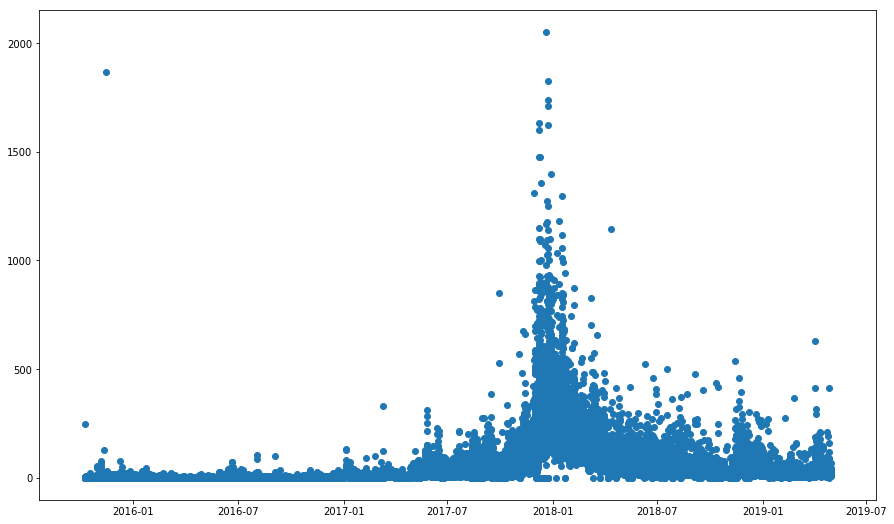

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
x_vals,y_vals = zip(*[(i.Date,float(i.Variance)) for i in geminiDatas])

figure(figsize=(15,10))
plt.gcf().autofmt_xdate()
plt.scatter(x_vals,y_vals)
plt.show()

In [ ]:
import tensorflow as tf

n_steps = 20
n_inputs = 7
n_neurons = 100
n_outputs = 1
learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])
lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

#dynamic_rnn to better use of GPU. could set swap_memory=true to avoid OOM errors
rnn_outputs, states = tf.nn.dynamic_rnn(lstm_cell, X, dtype=tf.float32) # tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, swap_memory=true)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = fully_connected(stacked_rnn_outputs, n_outputs,
activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

logits = fully_connected(states, n_outputs, activation_fn=None)

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
init = tf.global_variables_initializer()

In [ ]:
n_iterations = 10000
batch_size = 50
with tf.Session() as sess:
init.run()
for iteration in range(n_iterations):
X_batch, y_batch = [...] # fetch the next training batch
sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
if iteration % 100 == 0:
mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
print(iteration, "\tMSE:", mse)